## Main file to calibrate EBSM models for Tairua data

In [1]:
# Loading libraries

import os
import scipy.io
import numpy as np
# import pandas as pd
# import scipy.optimize as opt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from scipy.optimize import minimize
# import scipy.interpolate as interpolate
from scipy.interpolate import interp1d
from shapely.geometry import LineString

os.chdir('..')
os.chdir('./modules')
from IHSetDean import *
os.chdir('..')
os.chdir('./src')

plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'font.weight': 'bold'})
font = {'family': 'serif',
        'weight': 'bold',
        'size': 8}

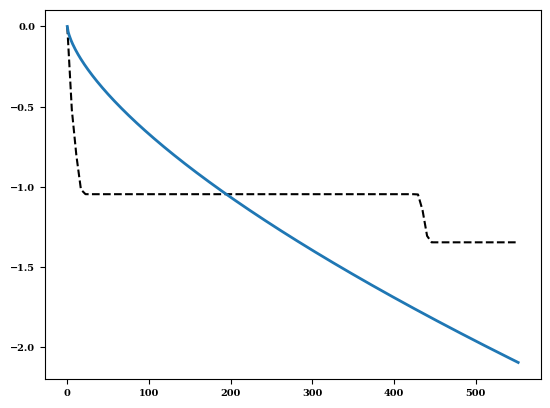

In [2]:
pt = r'D:\[IH-SET]\5_Models\1_Static_equilibrium\1_Beach_profile'
perfil = scipy.io.loadmat(pt + r'\perfiles_cierre.mat')

for p in range(1):
    
    d = perfil["perfil"]['d'][0][p].flatten()
    d = d - d[0]
    z = perfil["perfil"]['z'][0][p].flatten()
    CM = perfil["perfil"]['CM_95'][0][p].flatten()
    z = z - CM
    di = np.linspace(d[0], d[-1], 100)
    z = interp1d(d, z, kind='linear', fill_value='extrapolate')(di)
    d = di

    D50 = perfil["perfil"]['D50'][0][p].flatten()

    # Assuming the 'ajuste_perfil' function is defined as in the previous code
    pDeank, mDeank = Dean(d, z, D50)

    hk = []
    hk.append(plt.plot(d, z - z[0], '--k')[0])
    hk.append(plt.plot(mDeank['D'], mDeank['Z'], linewidth=2)[0])
